In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/91954/data science pg program/avocado.csv/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
dfc=df

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [6]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
(df.nunique())

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [8]:
df=df.drop(columns=['Unnamed: 0'])

In [9]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
df.info()#checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
df.loc[df['region']=='']#checking blank spaces of every columns

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [13]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
cat=df.select_dtypes('object')
cont=df.select_dtypes('number')

conventional    9126
organic         9123
Name: type, dtype: int64


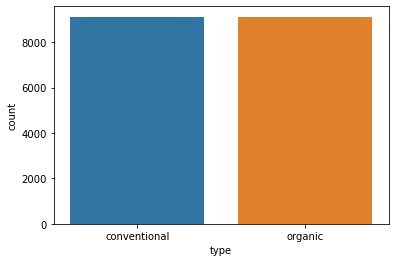

In [15]:
ax=sns.countplot(x='type',data=cat)
print(cat["type"].value_counts())

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

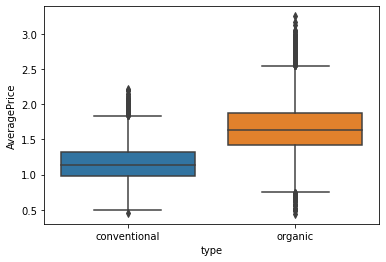

In [16]:
sns.boxplot(x='type',y='AveragePrice',data=df)

In [17]:
#we can see that the organic type has more averageprice than conventional

In [18]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [19]:
#we can see the mean price of every year which shows that they have not much difference

In [20]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [21]:
#we can see that the value count of every year is almost same but it also shows that in2018 it shows minimal data.

In [22]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

C:\Users\91954\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


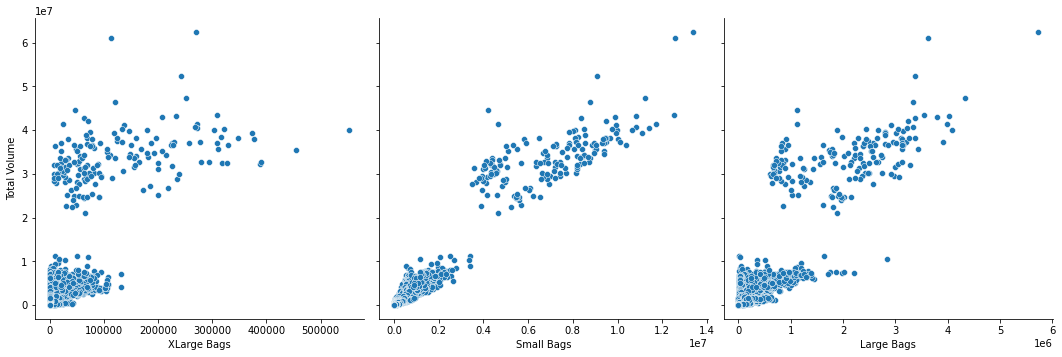

In [23]:
sns.pairplot(df,x_vars=['XLarge Bags', 'Small Bags', 'Large Bags'],y_vars=['Total Volume'],size=5)

In [24]:
#we can see that small bag is showing the best relationship,then large bags and then xlarge bags

C:\Users\91954\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


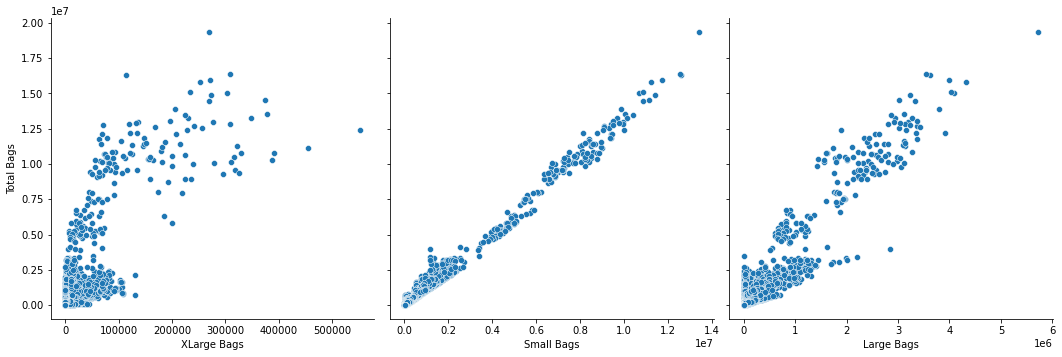

In [25]:
sns.pairplot(df,x_vars=['XLarge Bags', 'Small Bags', 'Large Bags'],y_vars=['Total Bags'],size=5)

In [26]:
#as we have seen above it also show similar results like the above plot

C:\Users\91954\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


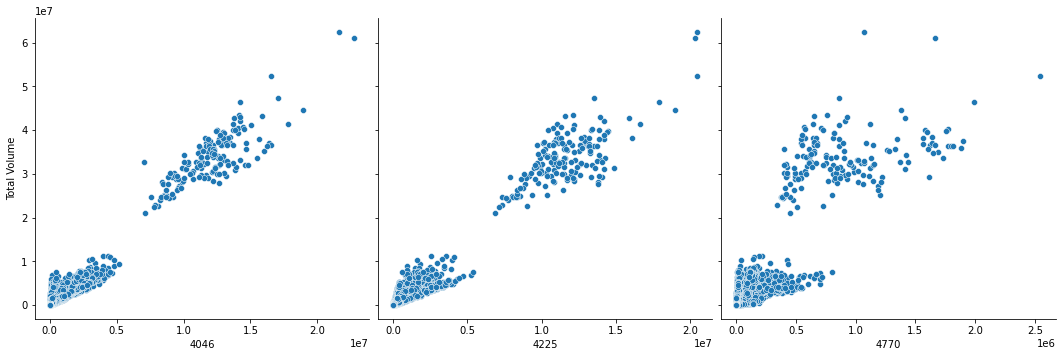

In [27]:
sns.pairplot(df,x_vars=['4046', '4225', '4770'],y_vars=['Total Volume'],size=5)

In [28]:
#we can see that all of them has good relation with total volume

In [29]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [30]:
Y=df['AveragePrice']
X=df.drop(columns = ['AveragePrice'])

In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


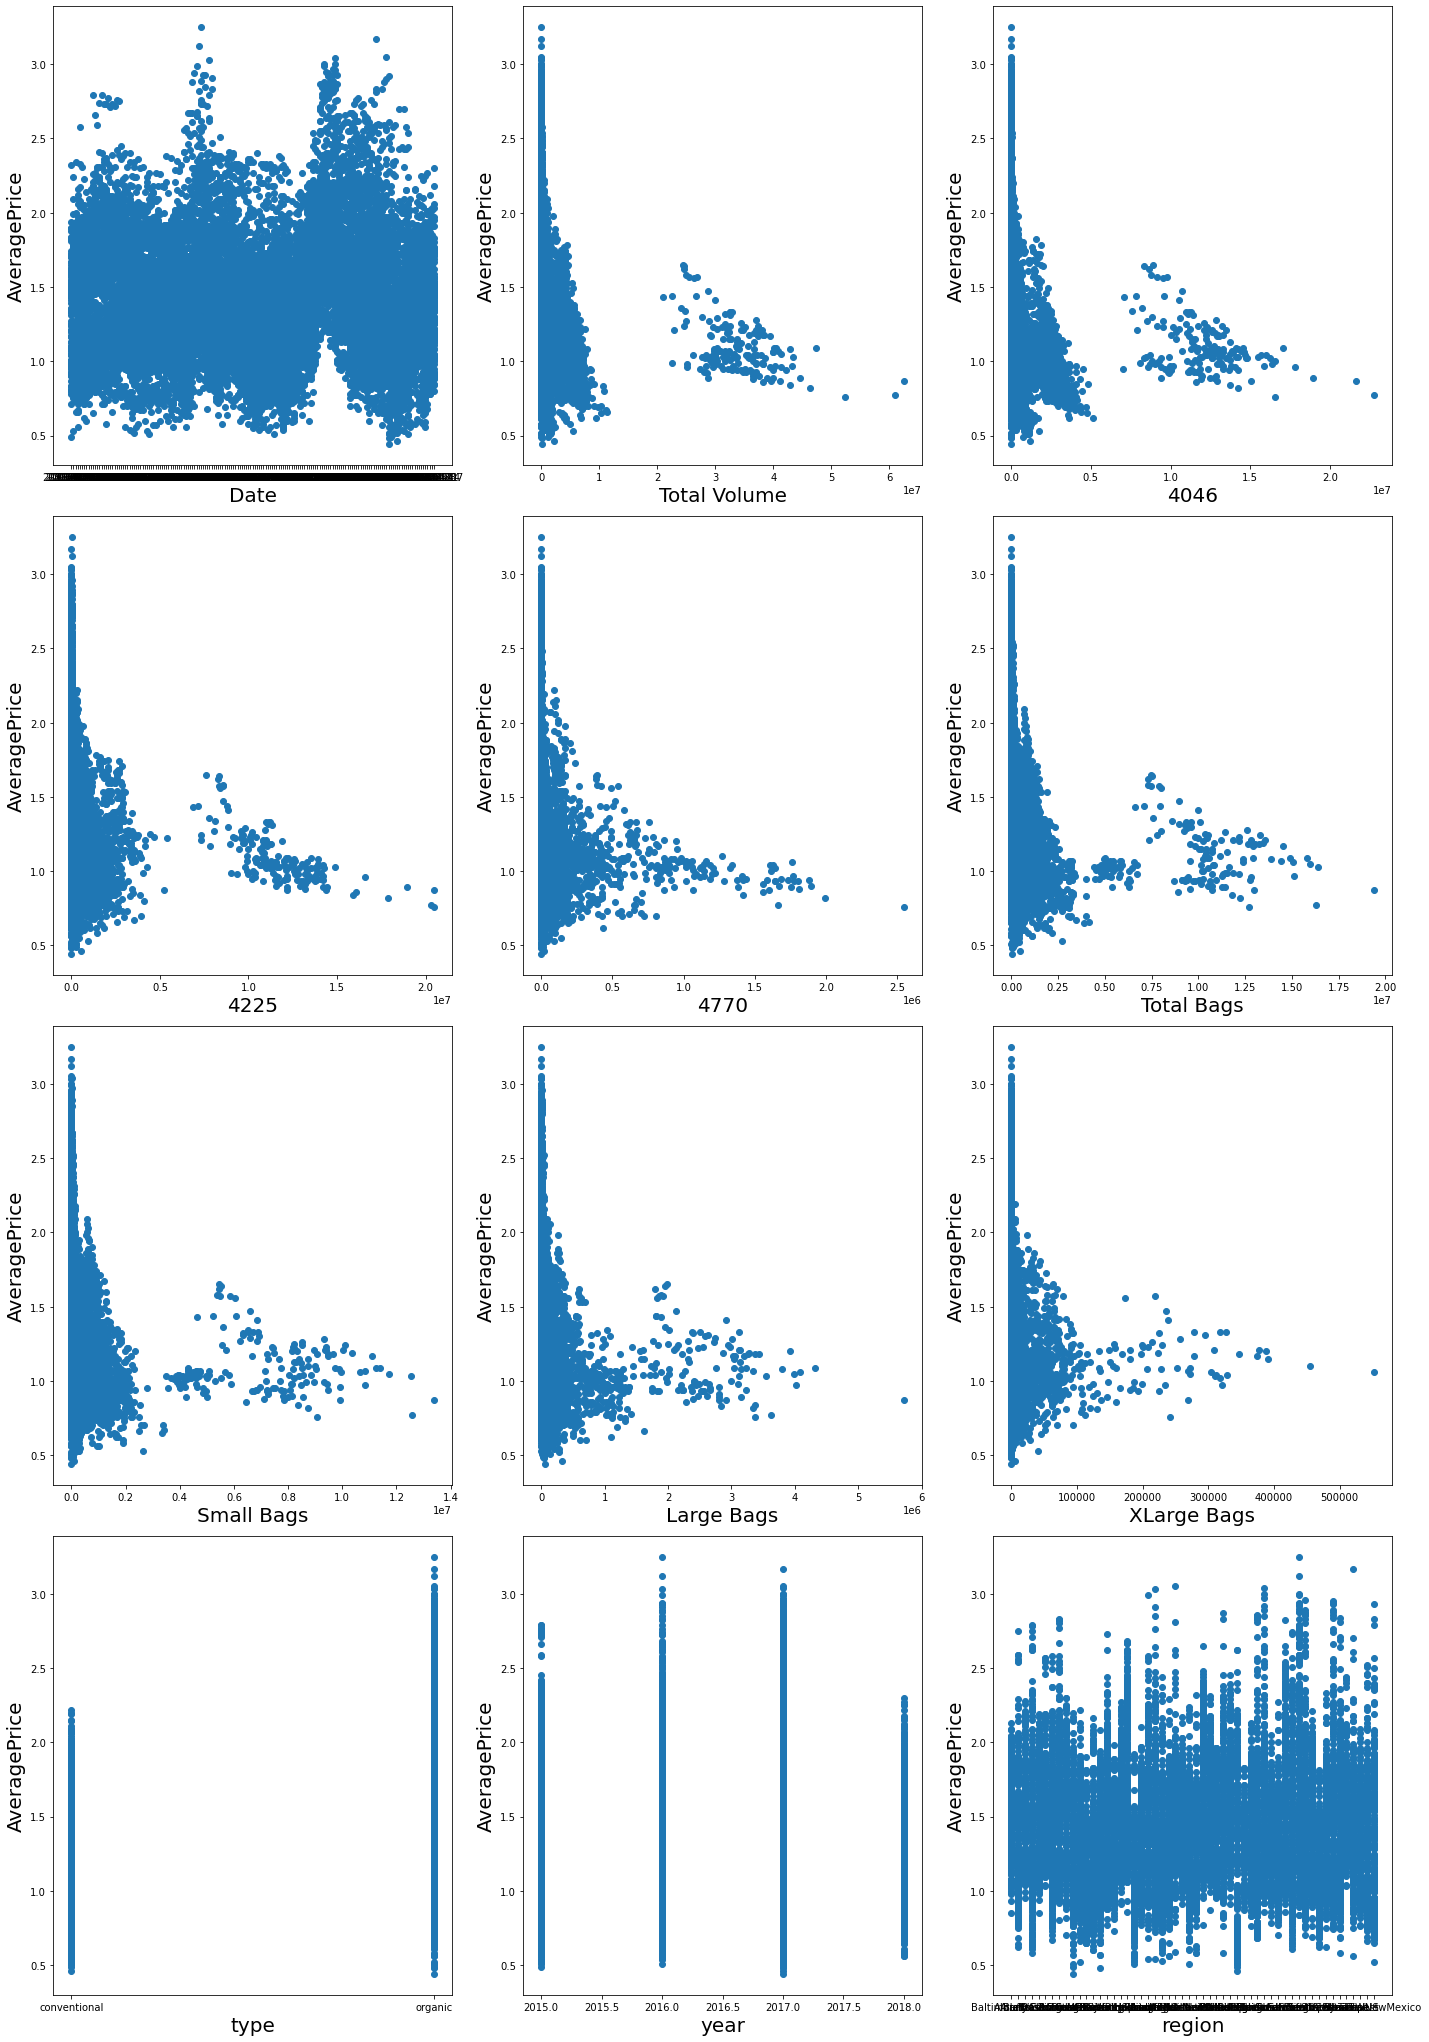

In [32]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=12:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [33]:
#we couldn't interpret much from scatterplot as we dont see any good relation

In [34]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [35]:
df.drop_duplicates()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [36]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


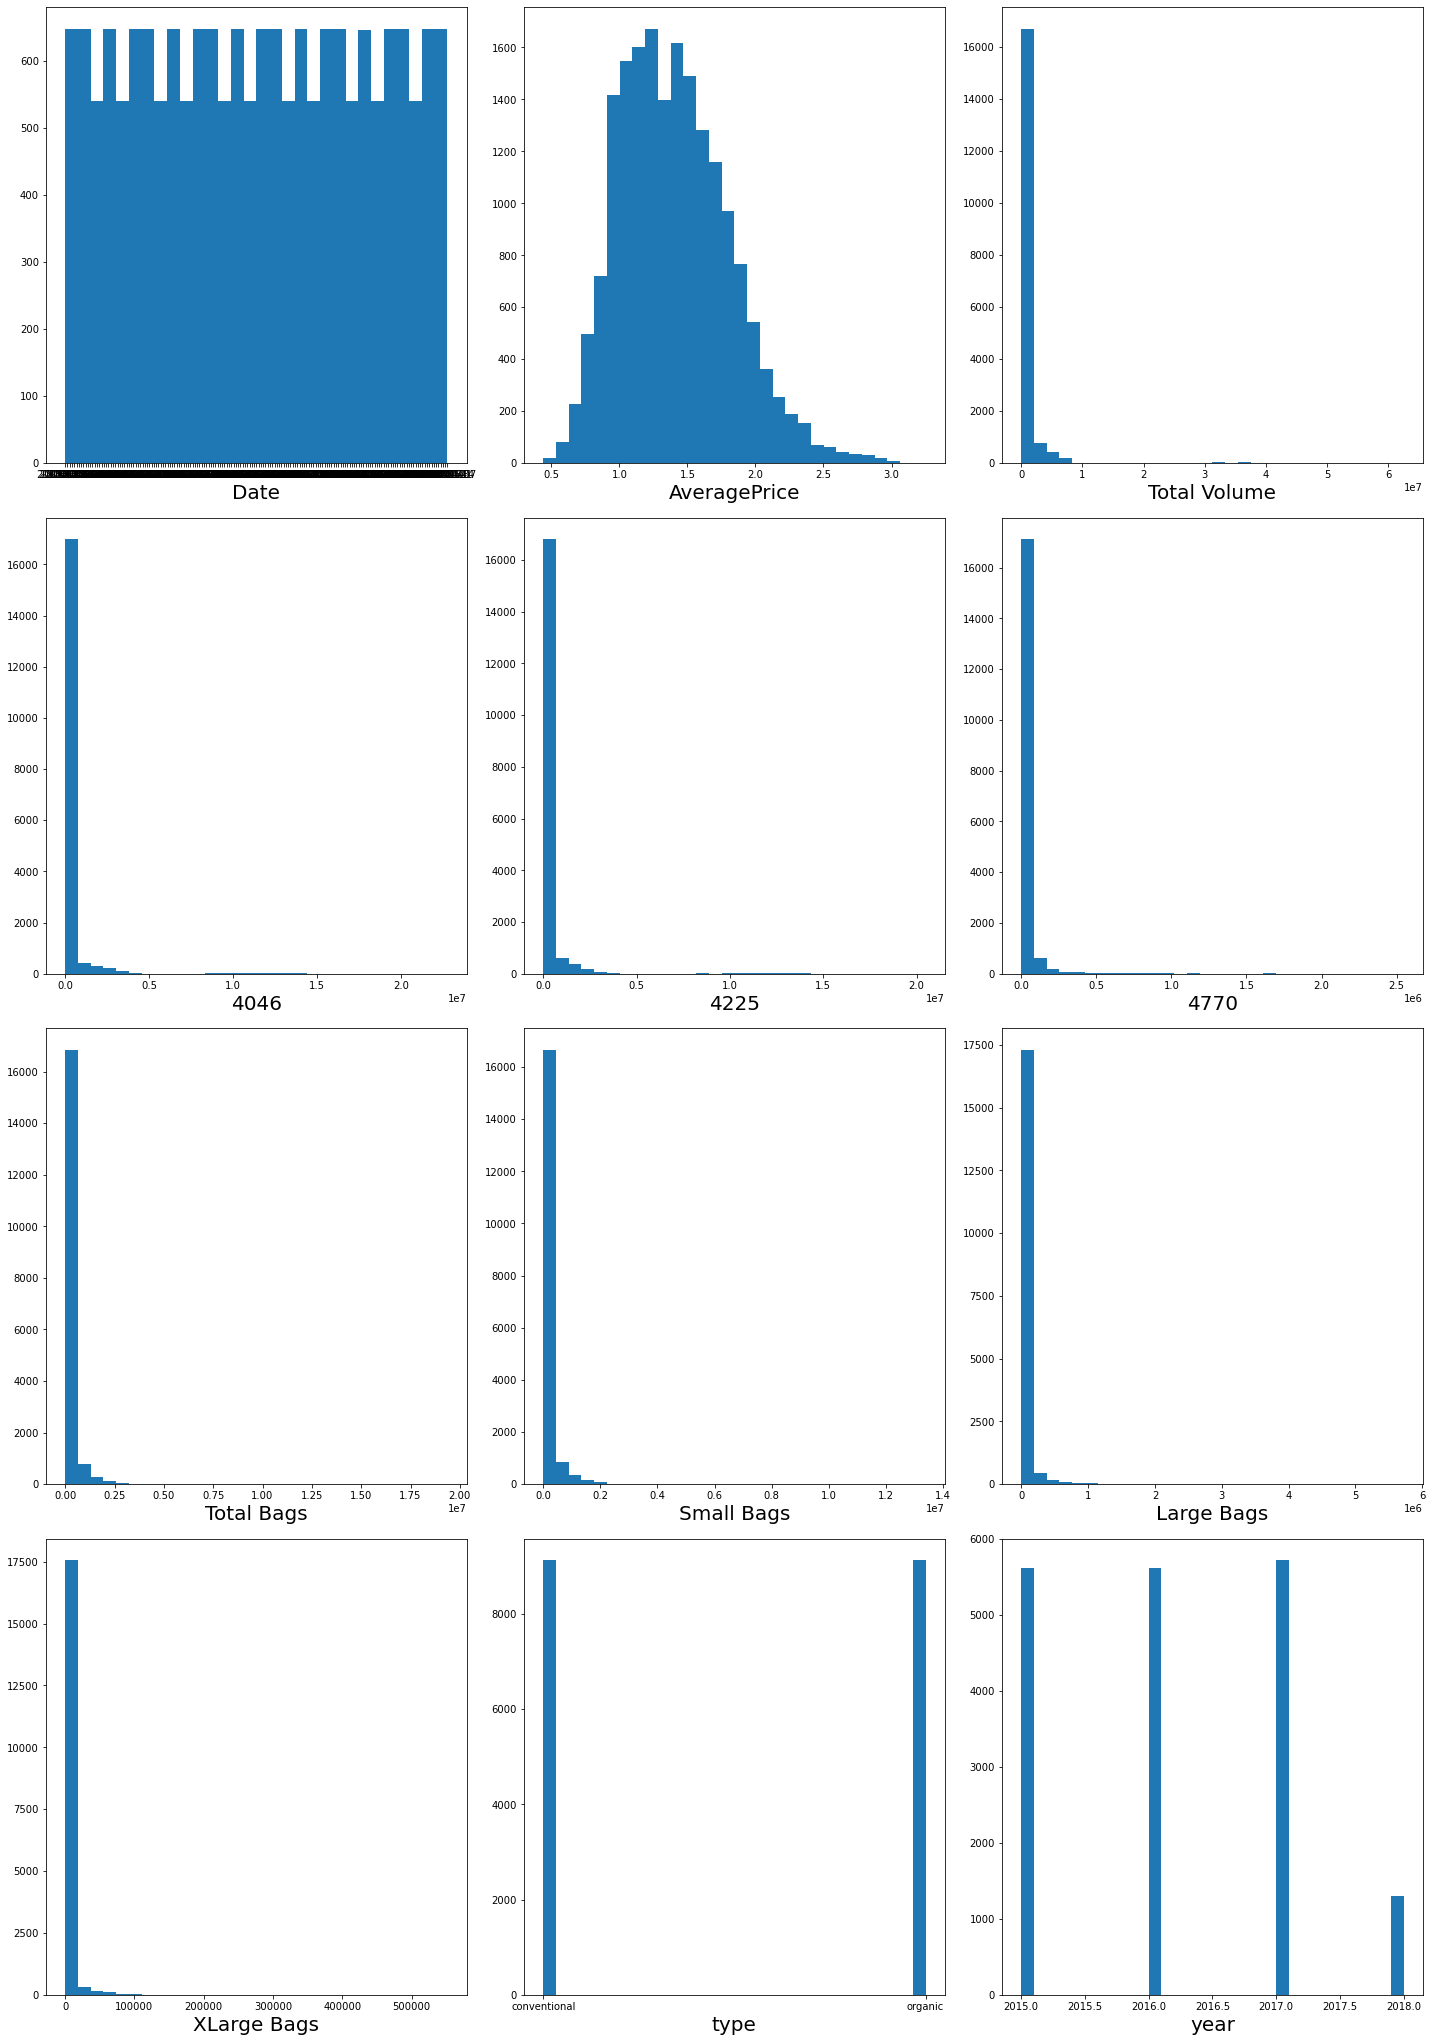

In [37]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=12:
        ax=plt.subplot(5,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [38]:
#as we can say that thereb is not much to interpret from this plot as it doesn't show much

conventional    9126
organic         9123
Name: type, dtype: int64


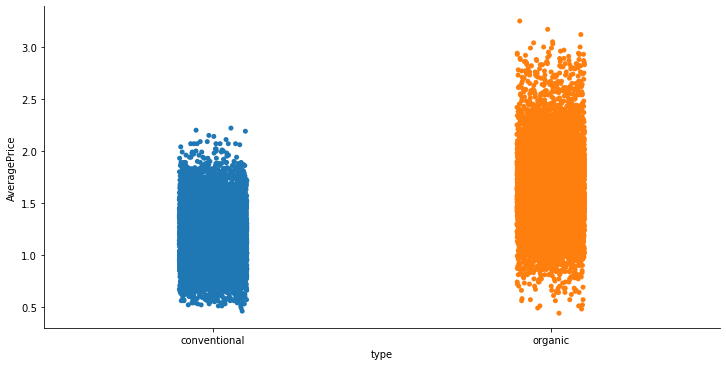

In [39]:
sns.catplot(x='type',y='AveragePrice',data=df,aspect=2)
print(cat["type"].value_counts())

In [40]:
#we can see the average price is more  with organic avacardo

In [41]:
cont.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

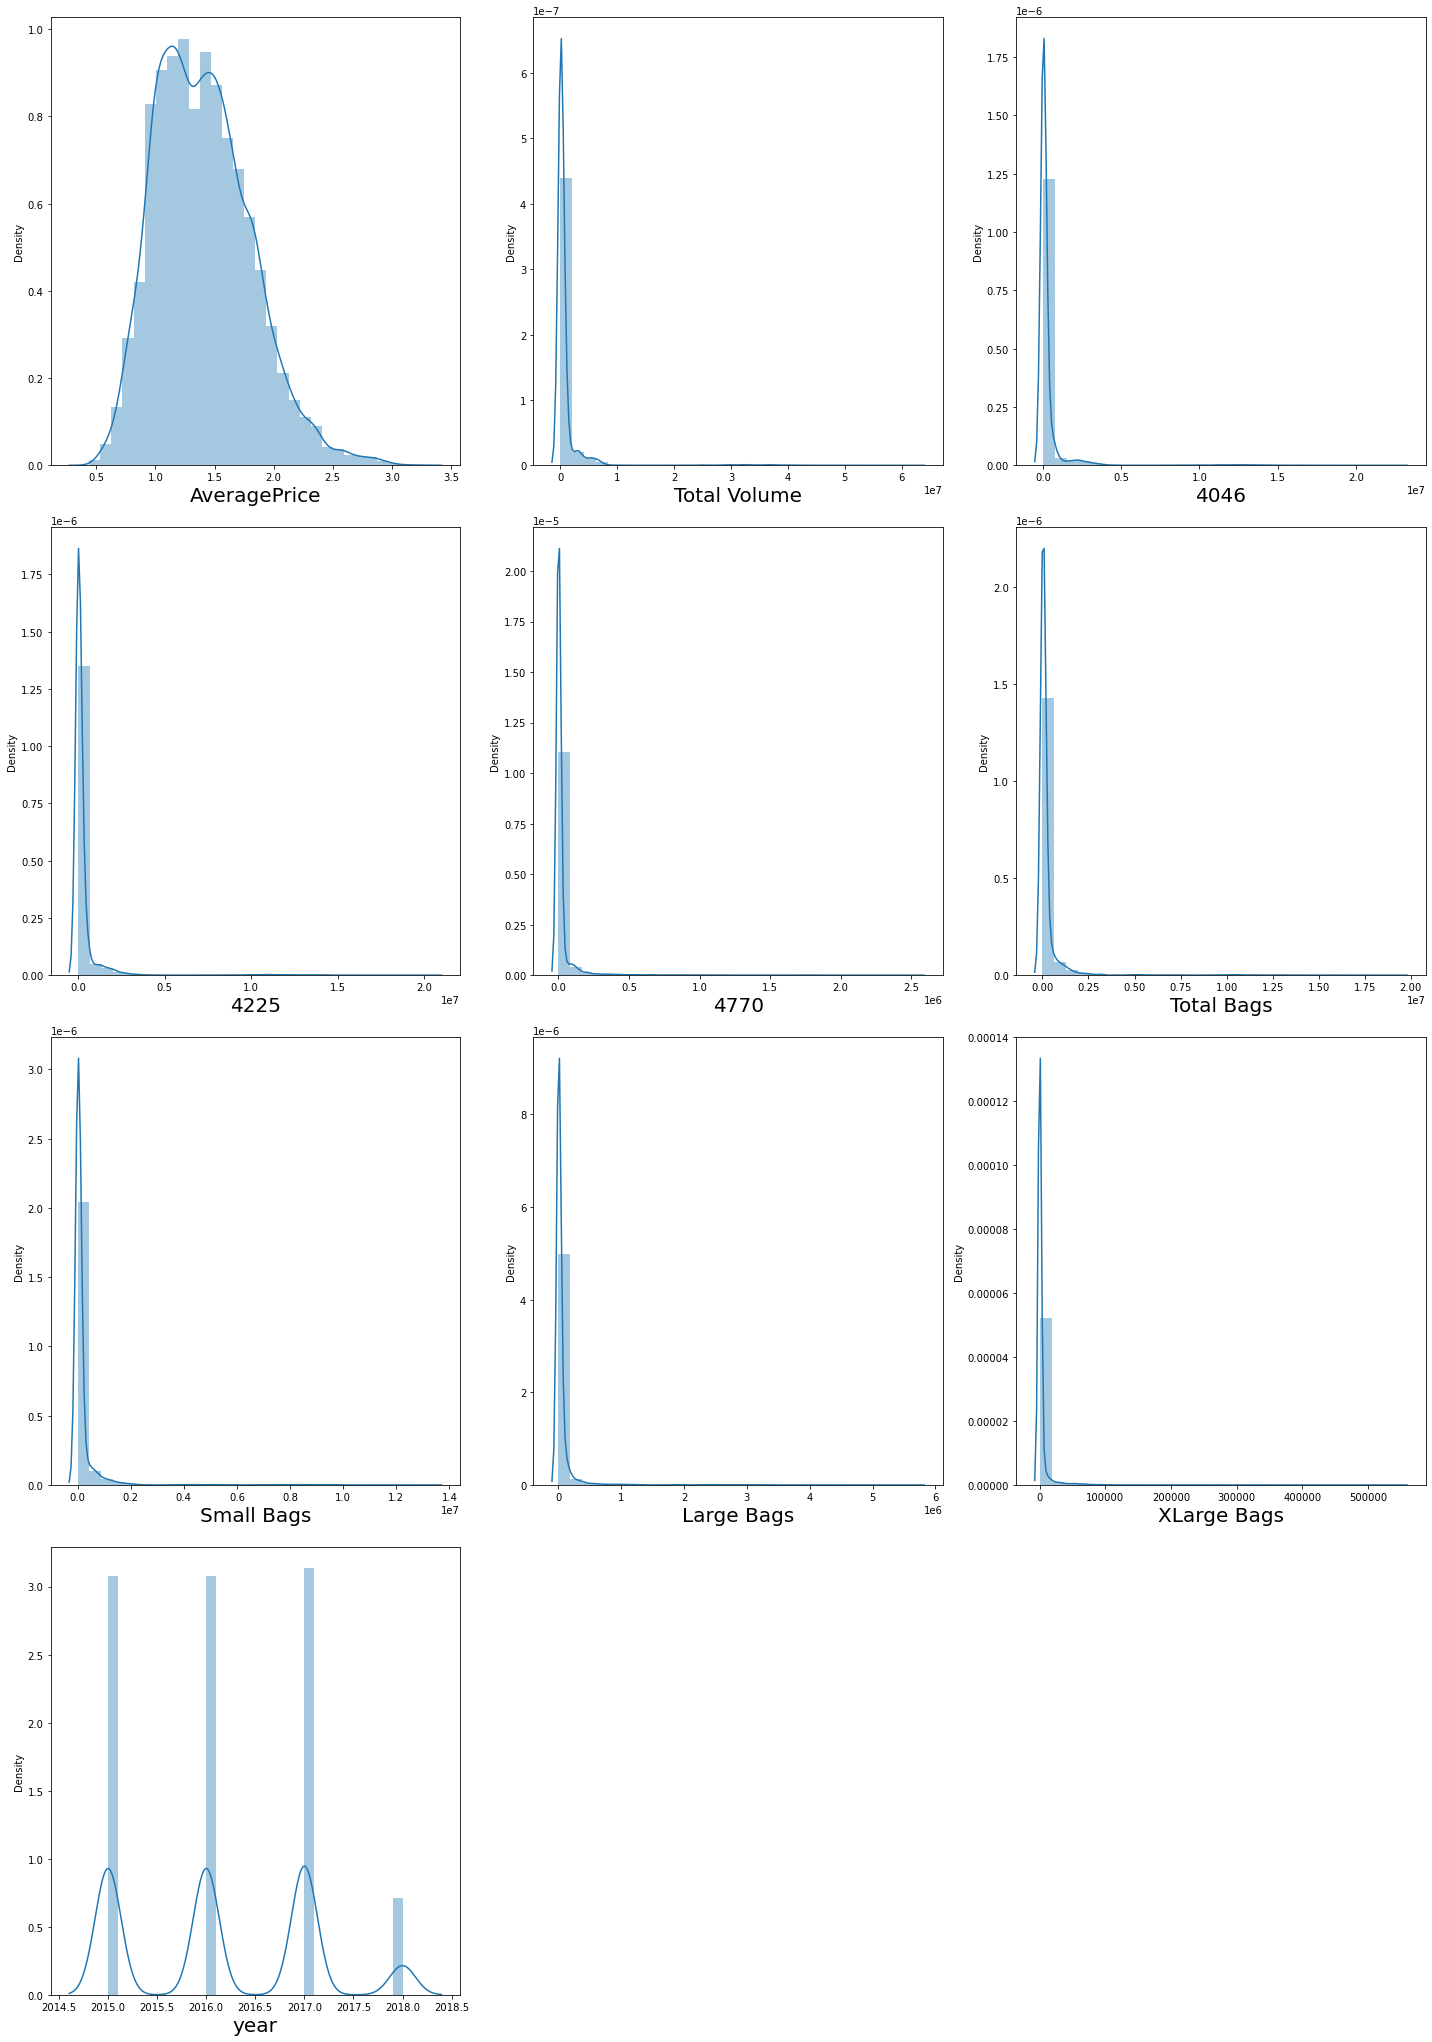

In [42]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in cont:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(cont[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [43]:
#as we can see that most of the columns except the target column are showing similar plot we cant interpret skewness from this also

In [44]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [45]:

en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
    
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [47]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [48]:
#we can see very much skewness in every column except target columns and object column

In [49]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


<AxesSubplot:>

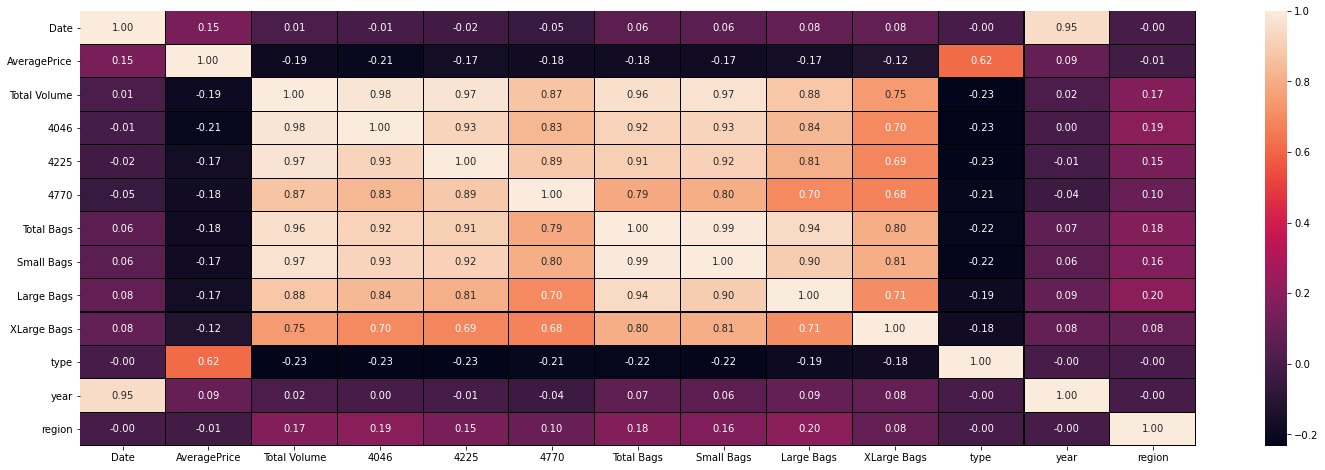

In [50]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [51]:
#we can see that region column has not much good corr with the feature columns and we can also say that averagge price has not much 
#corr with the features column but it has a good corr with type column.
#we can also see that all the bags column are showing corr which shows some indication of multicoliniarity.
#we can also see that all the columns other than target colum we can good relationship between them.

In [52]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

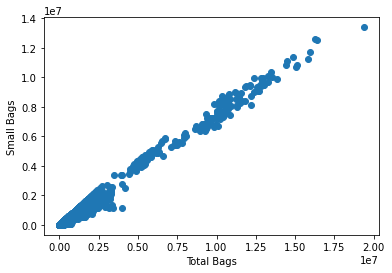

In [53]:
plt.scatter(df['Total Bags'],df['Small Bags'])
plt.xlabel('Total Bags')
plt.ylabel('Small Bags')
plt.show()

In [54]:
#we can see a very good relationship which shows signs of multicoliniarity

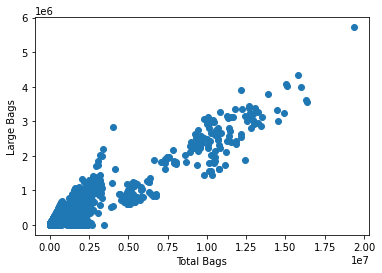

In [55]:
plt.scatter(df['Total Bags'],df['Large Bags'])
plt.xlabel('Total Bags')
plt.ylabel('Large Bags')
plt.show()

In [56]:
#we can see a very good relationship which shows signs of multicoliniarity

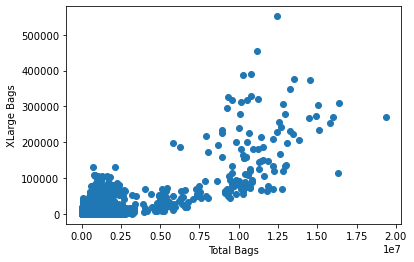

In [57]:
plt.scatter(df['Total Bags'],df['XLarge Bags'])
plt.xlabel('Total Bags')
plt.ylabel('XLarge Bags')
plt.show()

In [58]:
#we can see a very good relationship which shows signs of multicoliniarity

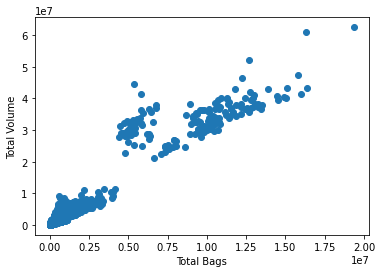

In [59]:
plt.scatter(df['Total Bags'],df['Total Volume'])
plt.xlabel('Total Bags')
plt.ylabel('Total Volume')
plt.show()

In [60]:
#we can see a good relation but we wont see it as multicoliniar

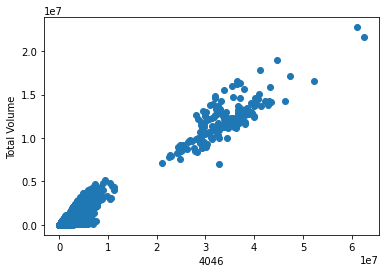

In [61]:
plt.scatter(df['Total Volume'],df['4046'])
plt.xlabel('4046')
plt.ylabel('Total Volume')
plt.show()

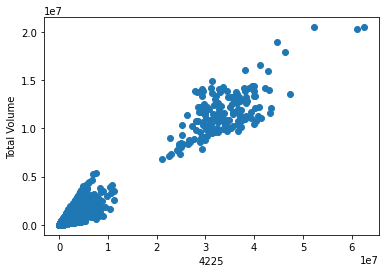

In [62]:
plt.scatter(df['Total Volume'],df['4225'])
plt.xlabel('4225')
plt.ylabel('Total Volume')
plt.show()

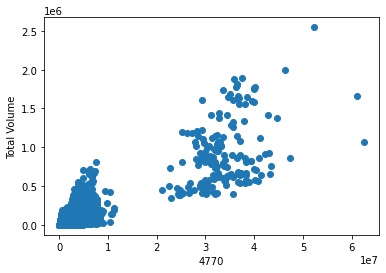

In [63]:
plt.scatter(df['Total Volume'],df['4770'])
plt.xlabel('4770')
plt.ylabel('Total Volume')
plt.show()

In [64]:
#after doing all above corr interpretation we came to the conclusion that we will drop all bags expect total bag 
#as we can also see that plucodes have a good relation with total volume which indicates to drop them and except only total volume
#and we have also seen before that the total column has some more data than the 3plu code data together,so we can see some data which are unique.

In [65]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

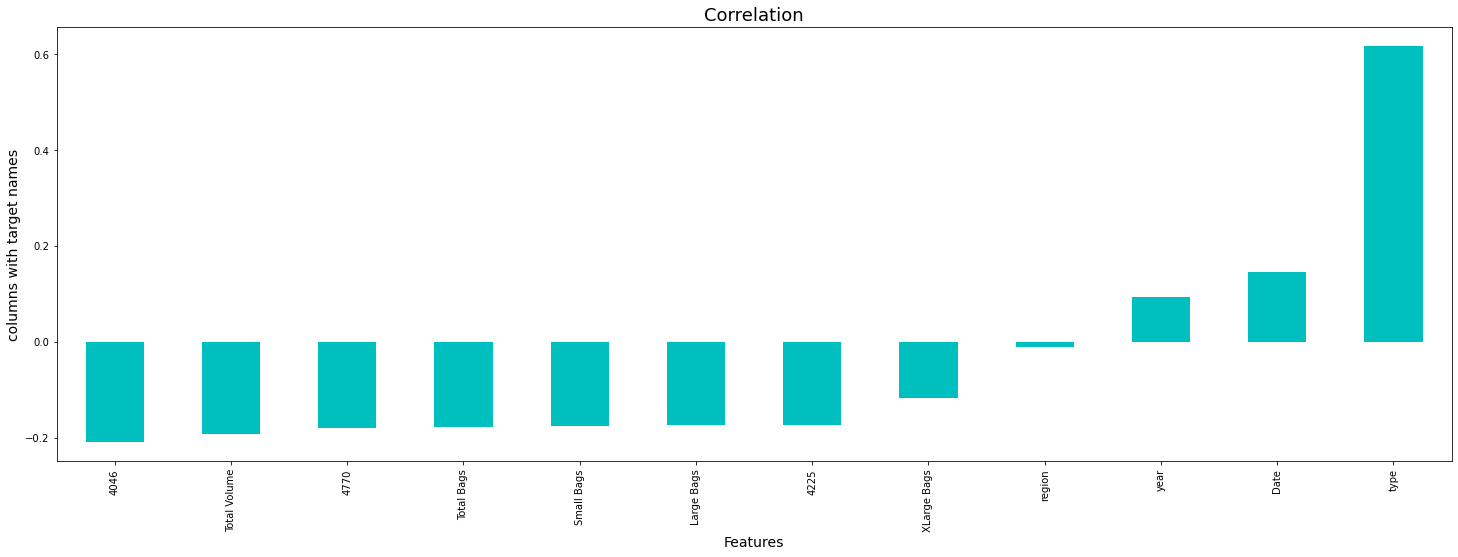

In [66]:
plt.figure(figsize=(25,8))
df.corr()['AveragePrice'].sort_values(ascending=True).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [67]:
#we can see that type has positive corr with average price,4046 have negativelycorr

In [68]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [69]:
df_c=df

In [70]:

df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)


In [71]:
df.skew()

Date           -0.277806
AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
dtype: float64

In [72]:
#we have reduced the skewness and we are taking the threshold 0.25

In [73]:
df.skew()[np.abs(df.skew())<0.25].all()

True

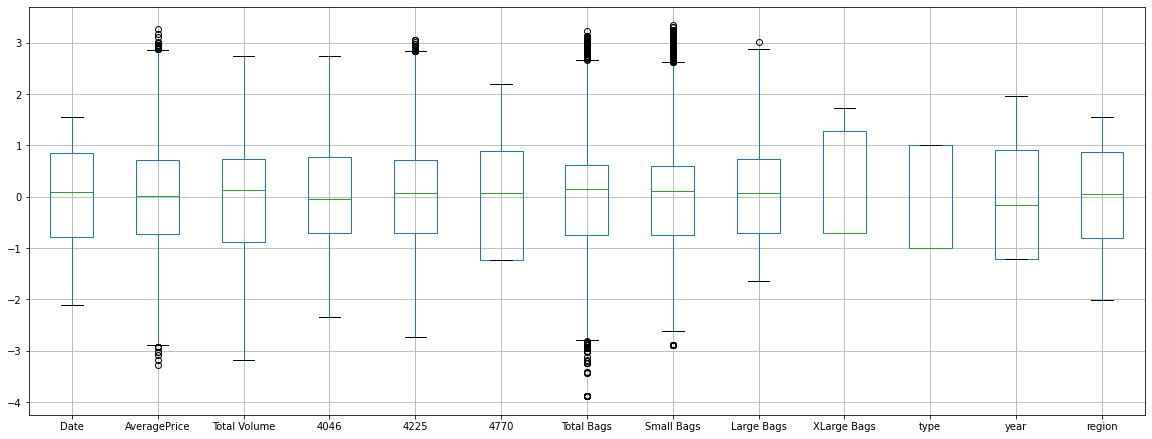

In [74]:
df.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [75]:
# as we can see outlier in total bagsand in averageprice

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
         5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
         5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
         5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
         8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
         8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
         8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
         8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
         9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
         9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
         9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
        11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
        11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
        11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
      

In [77]:
Z=df.drop('type',axis=1)


In [78]:
Z=Z.drop('region',axis=1)


In [79]:
Z=df.drop('year',axis=1)


In [80]:
Z=df.drop('Date',axis=1)


In [81]:
zn=np.abs(zscore(Z))
threshold=3
np.where(zn>3)


(array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
         5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
         5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
         5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
         8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
         8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
         8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
         8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
         9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
         9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
         9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
        11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
        11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
        11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
      

In [82]:
# we can see that the outliers are present in continuos data 

In [83]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.583054,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.605325,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,-0.627722,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,-0.650247,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.672903,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.440963,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,1.424894,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,1.408796,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,1.392669,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [84]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.583054,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.605325,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,-0.627722,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,-0.650247,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.672903,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.440963,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,1.424894,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,1.408796,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,1.392669,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [85]:
#dataloss is minimal

# regression model

In [86]:
X=df_new_z.drop("AveragePrice",axis=1)
Y=df_new_z['AveragePrice']

In [87]:
sc=StandardScaler()# standerdizing the data
X=sc.fit_transform(X)
X

array([[-0.58259031, -0.07965399, -0.65640948, ..., -1.00159987,
        -1.2214845 , -2.00908622],
       [-0.60485712, -0.14954635, -0.77581907, ..., -1.00159987,
        -1.2214845 , -2.00908622],
       [-0.62724897,  0.18916999, -0.7304558 , ..., -1.00159987,
        -1.2214845 , -2.00908622],
       ...,
       [ 1.40883879, -0.7720027 , -0.61724153, ...,  0.99840269,
         1.97022938,  1.55392625],
       [ 1.39271566, -0.69777597, -0.54701063, ...,  0.99840269,
         1.97022938,  1.55392625],
       [ 1.37656355, -0.66313547, -0.36284934, ...,  0.99840269,
         1.97022938,  1.55392625]])

In [88]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.5644108366339097
At random state0,the testing  accuracy is :- 0.5527341171009461


At random state1,the training accuracy is :- 0.5559321182929716
At random state1,the testing  accuracy is :- 0.5651411292368966


At random state2,the training accuracy is :- 0.5709595405576476
At random state2,the testing  accuracy is :- 0.5424345937628282


At random state3,the training accuracy is :- 0.5605382457178039
At random state3,the testing  accuracy is :- 0.5577127079969202


At random state4,the training accuracy is :- 0.5581367832902475
At random state4,the testing  accuracy is :- 0.561893435577815


At random state5,the training accuracy is :- 0.5564108465156948
At random state5,the testing  accuracy is :- 0.5641405805457333


At random state6,the training accuracy is :- 0.5574183010151452
At random state6,the testing  accuracy is :- 0.56293212682391


At random state7,the training accuracy is :- 0.5551717061644136
At random state7,the testing 

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=79)

In [90]:
lr.fit(X_train,Y_train)

LinearRegression()

In [91]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.5648737167265034


In [92]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is -2.1266820413874417 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 3 the cv score is 0.182412980927681 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 4 the cv score is 0.11574408908459624 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 5 the cv score is 0.21792187544407246 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 6 the cv score is 0.07926588166114897 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 7 the cv score is 0.16455429573523941 and accuracy score for training is -0.5552468843139429 and accuracy score for testing is 0.5648737167265034


At cross fold 8 the cv score i

In [93]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest( f_regression,k=5).fit_transform(X, Y)
X_new


array([[-0.07965399, -0.65640948, -0.24350836, -0.5318791 , -1.00159987],
       [-0.14954635, -0.77581907, -0.19702778, -0.4928095 , -1.00159987],
       [ 0.18916999, -0.7304558 , -0.00192087, -0.56059484, -1.00159987],
       ...,
       [-0.7720027 , -0.61724153,  0.4090958 , -0.49799845,  0.99840269],
       [-0.69777597, -0.54701063,  0.40879383, -0.4296265 ,  0.99840269],
       [-0.66313547, -0.36284934,  0.12883324, -0.38935054,  0.99840269]])

In [95]:
len(X_new)

18141

In [96]:
#as we can see all  are best

In [97]:
#regularization

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,30)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



{'alpha': 0.0001, 'random_state': 7, 'selection': 'random'}


In [99]:
ls=Lasso(alpha=0.0001,random_state=7,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.5648624575691471

In [100]:
cv_score=cross_val_score(ls,X,Y,cv=6)
cv_mean=cv_score.mean()
cv_mean

0.07977581264811202

In [101]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(10,40)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 1, 'random_state': 10, 'solver': 'sag'}


In [102]:
rs=Ridge(alpha=1,random_state=10,solver='sag')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.5648624575691471

In [103]:
cv_score=cross_val_score(rs,X,Y,cv=6)
cv_mean=cv_score.mean()
cv_mean



0.07957607123740944

In [104]:
#we can see that regularisation   improvesthe r2_score

In [105]:
#ensemble techniques

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

In [107]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 89.96480944261313
cross_val_score: 42.59814184683848


In [108]:
# we can see that the r2 score is improving 

In [109]:
#knn model

In [110]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 2}


In [111]:
kn= KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 86.82858910442421
cross_val_score: 12.118983193884265


In [112]:
#knn is also giving more score than linera model but cross val is still not satisfactory

In [113]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 8}


In [114]:
bg=BaggingRegressor(max_features=3,random_state=8)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,X,Y,cv=6)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 74.22059784577655
cross_val_score: 13.60803401262596


In [115]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\91954\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 168, in fit
    raise ValueError("Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91954\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tr

In [116]:

dt=DecisionTreeRegressor(criterion="mse",splitter="best",max_features="auto")
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dtt=r2_score(Y_test,pred_decision)
print('r2_score:',dtt*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

r2_score: 77.25136989970518
cross_val_score: -4.032682221521178


In [117]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging','decisiontree'],
    'R2score':[56.48624575691471,89.8727049079883,86.82858910442421, 74.22059784577655,76.74659420813353 ]
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=False)

,model,R2score
1,random forest,89.872705
2,KNeighborsRegressor,86.828589
4,decisiontree,76.746594
3,bagging,74.220598
0,linear regression,56.486246


In [118]:
#we conclude random forent has the best model 

In [119]:
filename='avacado.pkl'
pickle.dump(rf,open(filename,'wb'))

In [120]:
loaded_model=pickle.load(open('avacado.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8996480944261314


In [121]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256
Predicted,2.537762,-1.466988,0.950667,-1.051337,-0.187443,-0.42127,-0.468749,-0.808762,0.293060,0.276010,...,1.338913,-0.805787,0.253130,0.881185,-0.145758,-0.111336,-0.839112,0.335171,-0.426926,-0.725394
Original,2.886854,-1.622529,1.046872,-0.643299,-0.008128,-0.46917,-0.526507,-0.584545,0.243104,0.387472,...,1.087520,-0.412519,0.457967,0.985181,0.434591,-0.328797,-0.034022,0.685278,-0.356539,-0.763019


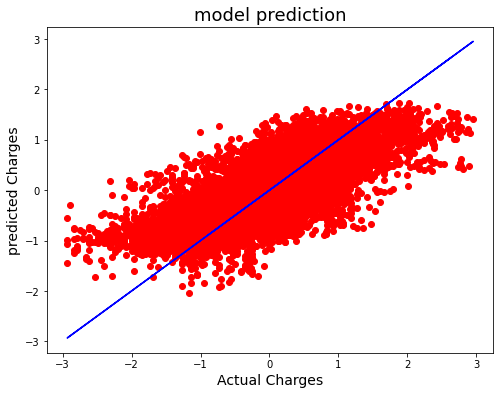

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred_test,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('predicted Charges',fontsize=14)
plt.title('model prediction',fontsize=18)
plt.show()


In [123]:
#so this is the predicted average price

In [124]:
df_new_z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.583054,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.605325,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,-0.627722,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,-0.650247,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.672903,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.440963,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,1.424894,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,1.408796,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,1.392669,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [125]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.6 MB


# classification model

In [126]:
x=df_new_z.drop("region",axis=1)
y=df_new_z['region']

In [127]:
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.583054,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895
1,-0.605325,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895
2,-0.627722,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895
3,-0.650247,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895
4,-0.672903,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.440963,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548
18245,1.424894,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548
18246,1.408796,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548
18247,1.392669,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548


In [128]:
y=y.astype(int)
y.dtypes

dtype('int32')

In [129]:
len(x),len(y)

(18141, 18141)

In [130]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[-0.58259031, -0.08785853, -0.07965399, ..., -0.69702769,
        -1.00159987, -1.2214845 ],
       [-0.60485712, -0.03546672, -0.14954635, ..., -0.69702769,
        -1.00159987, -1.2214845 ],
       [-0.62724897, -1.27931307,  0.18916999, ..., -0.69702769,
        -1.00159987, -1.2214845 ],
       ...,
       [ 1.40883879,  1.15009185, -0.7720027 , ..., -0.69702769,
         0.99840269,  1.97022938],
       [ 1.39271566,  1.26855203, -0.69777597, ..., -0.69702769,
         0.99840269,  1.97022938],
       [ 1.37656355,  0.61891043, -0.66313547, ..., -0.69702769,
         0.99840269,  1.97022938]])

In [131]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [138]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=i)
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute','ball_tree'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsClassifier()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 1}


In [139]:
kn= KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

accuracy_score: 43.681962243351244
cross_val_score: 56.70506678370004


In [140]:
y_pred_kn = kn.predict(X_test)
print("KNeighborsClassifier report: \n\n", classification_report(y_test, y_pred_kn))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

          -2       0.02      0.02      0.02       152
          -1       0.19      0.18      0.19      1364
           0       0.59      0.60      0.60      4316
           1       0.21      0.21      0.21      1425

    accuracy                           0.43      7257
   macro avg       0.25      0.25      0.25      7257
weighted avg       0.43      0.43      0.43      7257



In [141]:
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [142]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

accuracy_score: 56.138900372054565
cross_val_score: 74.64238384612739


In [143]:
y_pred_rf = rf.predict(X_test)
print("RandomRainforestClassifier report: \n\n", classification_report(y_test, y_pred_rf))

RandomRainforestClassifier report: 

               precision    recall  f1-score   support

          -2       0.00      0.00      0.00       152
          -1       0.21      0.05      0.08      1364
           0       0.59      0.90      0.72      4316
           1       0.19      0.05      0.08      1425

    accuracy                           0.56      7257
   macro avg       0.25      0.25      0.22      7257
weighted avg       0.43      0.56      0.46      7257



In [144]:
from sklearn.tree import DecisionTreeClassifier


parameters={'criterion':["gini", "entropy"],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}


In [145]:
dt=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',splitter='random')
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dts=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',dts*100)
dtscore=cross_val_score(dt,x,y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

accuracy_score: 42.68981672867576
cross_val_score: 58.76703795300112


In [146]:
y_pred_dt = dt.predict(X_test)
print("DecisionTreeClassifier report: \n\n", classification_report(y_test, y_pred_dt))

DecisionTreeClassifier report: 

               precision    recall  f1-score   support

          -2       0.01      0.01      0.01       152
          -1       0.18      0.18      0.18      1364
           0       0.59      0.58      0.59      4316
           1       0.18      0.19      0.19      1425

    accuracy                           0.42      7257
   macro avg       0.24      0.24      0.24      7257
weighted avg       0.42      0.42      0.42      7257



In [147]:
#as we can see randomrainforest is giving the best score

In [148]:
filename='avacadocl.pkl'
pickle.dump(rf,open(filename,'wb'))

In [149]:
loaded_model=pickle.load(open('avacadocl.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.5613890037205457


In [150]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256
Predicted,0,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Original,0,1,0,0,0,-1,1,-1,1,0,...,-1,0,0,0,0,-1,0,0,0,0


In [ ]:
#this is the model